## Summary
Communications in disaster situations are vital. Anticipating the disaster to prepare the population and being able to communicate when the disaster has already occurred is essential.

This machine learning algorithm aims to be able to anticipate the disaster, and also know the global status of all communications when the disaster has occurred.

The basis of its operation is through the analysis of the radioelectric spectrum and the detection of anomalies in it to detect (for example through signal disturbances) that a disaster may occur, or to detect that communications have been interrupted in certain areas, among other functions.

It can work without telephone coverage, analyzes all frequencies (also those used by emergencies, military, police,...) and can be designed to work without electricity in the event of a disaster.

It can be implemented at a very low cost, is very easy to use, and is highly scalable and replicable.

## Basic technical characteristics (DEMO):

Development of a spectrum analyser thought especially for potencial disaster area whose objective is to perform the permanent monitoring of the RF spectrum environment. 

The device will carry out a constant modular monitoring (usually within a range that will be between 30 kHz and 30 GHz, range and bands which could be defined according to the geographical environment where the device is used).

The objective of the development of the base is to establish it on open systems such as the microcontrollers / microprocessors as ARDUINO or RASPBERRY to mention two examples.

Although there are different possible options (in the same way that there are different possibilities of subsequent connectivity to the display or warning platforms, as well as the networks: SIGFOX, LORA, etc.), in this case, it is specifically chosen Raspberry Pi, not only due to its low cost of development but also due to its capacity to work with a SDR system with an RTL-SDR receptor, and the ability to integrate the machine learning model.

The base system (in general applied to the whole “IoT environment” and “classic ISM”) allows to obtain an autonomous system which is capable of detecting malfunctions or disturbances in the communications frequency bands which are in the IEEE 802.11g/b/n/ac standard. In this case, due to the own restrictions of the used system, the frequency band  that can be used will be those which are between 26 and 1766 MHz, but this base allows that you can work can by setting slight variations on any other band/s spectrum. 

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('../rfsignalsml_spectrumsensdisasters_jgc/labelData.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


The next hidden code cells define functions for plotting data.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file:

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# labelData.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../rfsignalsml_spectrumsensdisasters_jgc/labelData.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'labelData.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 251 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,4.587119e-09,6.709552e-10,-3.744681e-09,-3.622069e-09,1.374738e-09,3.932327e-09,4.503545e-09,-8.508629e-10,-4.883812e-09,-4.370552e-09,...,-5.629192e-09,-7.775050e-09,1.479223e-10,6.287784e-09,8.302013e-09,1.131423e-09,-7.568774e-09,-6.699603e-09,1.327808e-09,3
0,-6.193120e-09,-4.108089e-09,3.688134e-09,6.855067e-09,-3.319284e-10,-3.711743e-09,-6.686678e-09,-6.364625e-10,6.963667e-09,3.036288e-09,...,-5.652138e-09,-1.635793e-09,4.639954e-09,2.697727e-09,1.631278e-09,-4.388555e-09,-4.568383e-09,1.380168e-09,3.805037e-09,3
1,-7.855134e-10,-6.744325e-10,9.331296e-10,1.031110e-09,-1.722784e-09,-6.865033e-10,-1.817085e-09,3.209804e-10,2.842205e-09,-1.041392e-09,...,5.258473e-10,-4.922630e-09,-4.577231e-09,-5.363626e-10,4.953010e-09,3.704551e-09,-1.796532e-09,-5.256430e-09,-4.278138e-09,3
2,9.503947e-10,-4.299930e-09,-3.738353e-09,1.836651e-09,5.714479e-09,3.646678e-09,-1.552975e-09,-4.762805e-09,-1.188280e-09,3.126457e-09,...,-2.791520e-09,-4.975538e-09,-3.150896e-10,3.527866e-09,4.935397e-09,1.001832e-09,-4.214792e-09,-3.846703e-09,-1.103428e-10,3
3,1.699311e-09,2.358604e-09,2.560980e-10,-2.886495e-09,1.985425e-11,-4.329985e-10,2.580742e-09,2.640618e-09,-9.424879e-10,-2.455975e-09,...,3.640201e-09,1.745003e-10,-3.598488e-09,-2.812539e-09,-3.009347e-10,4.093057e-09,3.789257e-09,-1.430784e-09,-6.461242e-09,3
4,4.450855e-09,-1.394204e-09,-5.867613e-09,-2.318473e-09,7.414551e-09,4.925271e-09,2.071537e-09,-4.196864e-09,-5.489808e-09,4.349551e-09,...,1.974023e-09,9.496325e-10,-9.784851e-10,9.357856e-10,-1.522209e-09,8.121247e-10,1.766152e-09,6.526557e-10,2.131776e-11,3


Distribution graphs (histogram/bar graph) of sampled columns:

Correlation matrix:

/tmp/ipykernel_51/128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


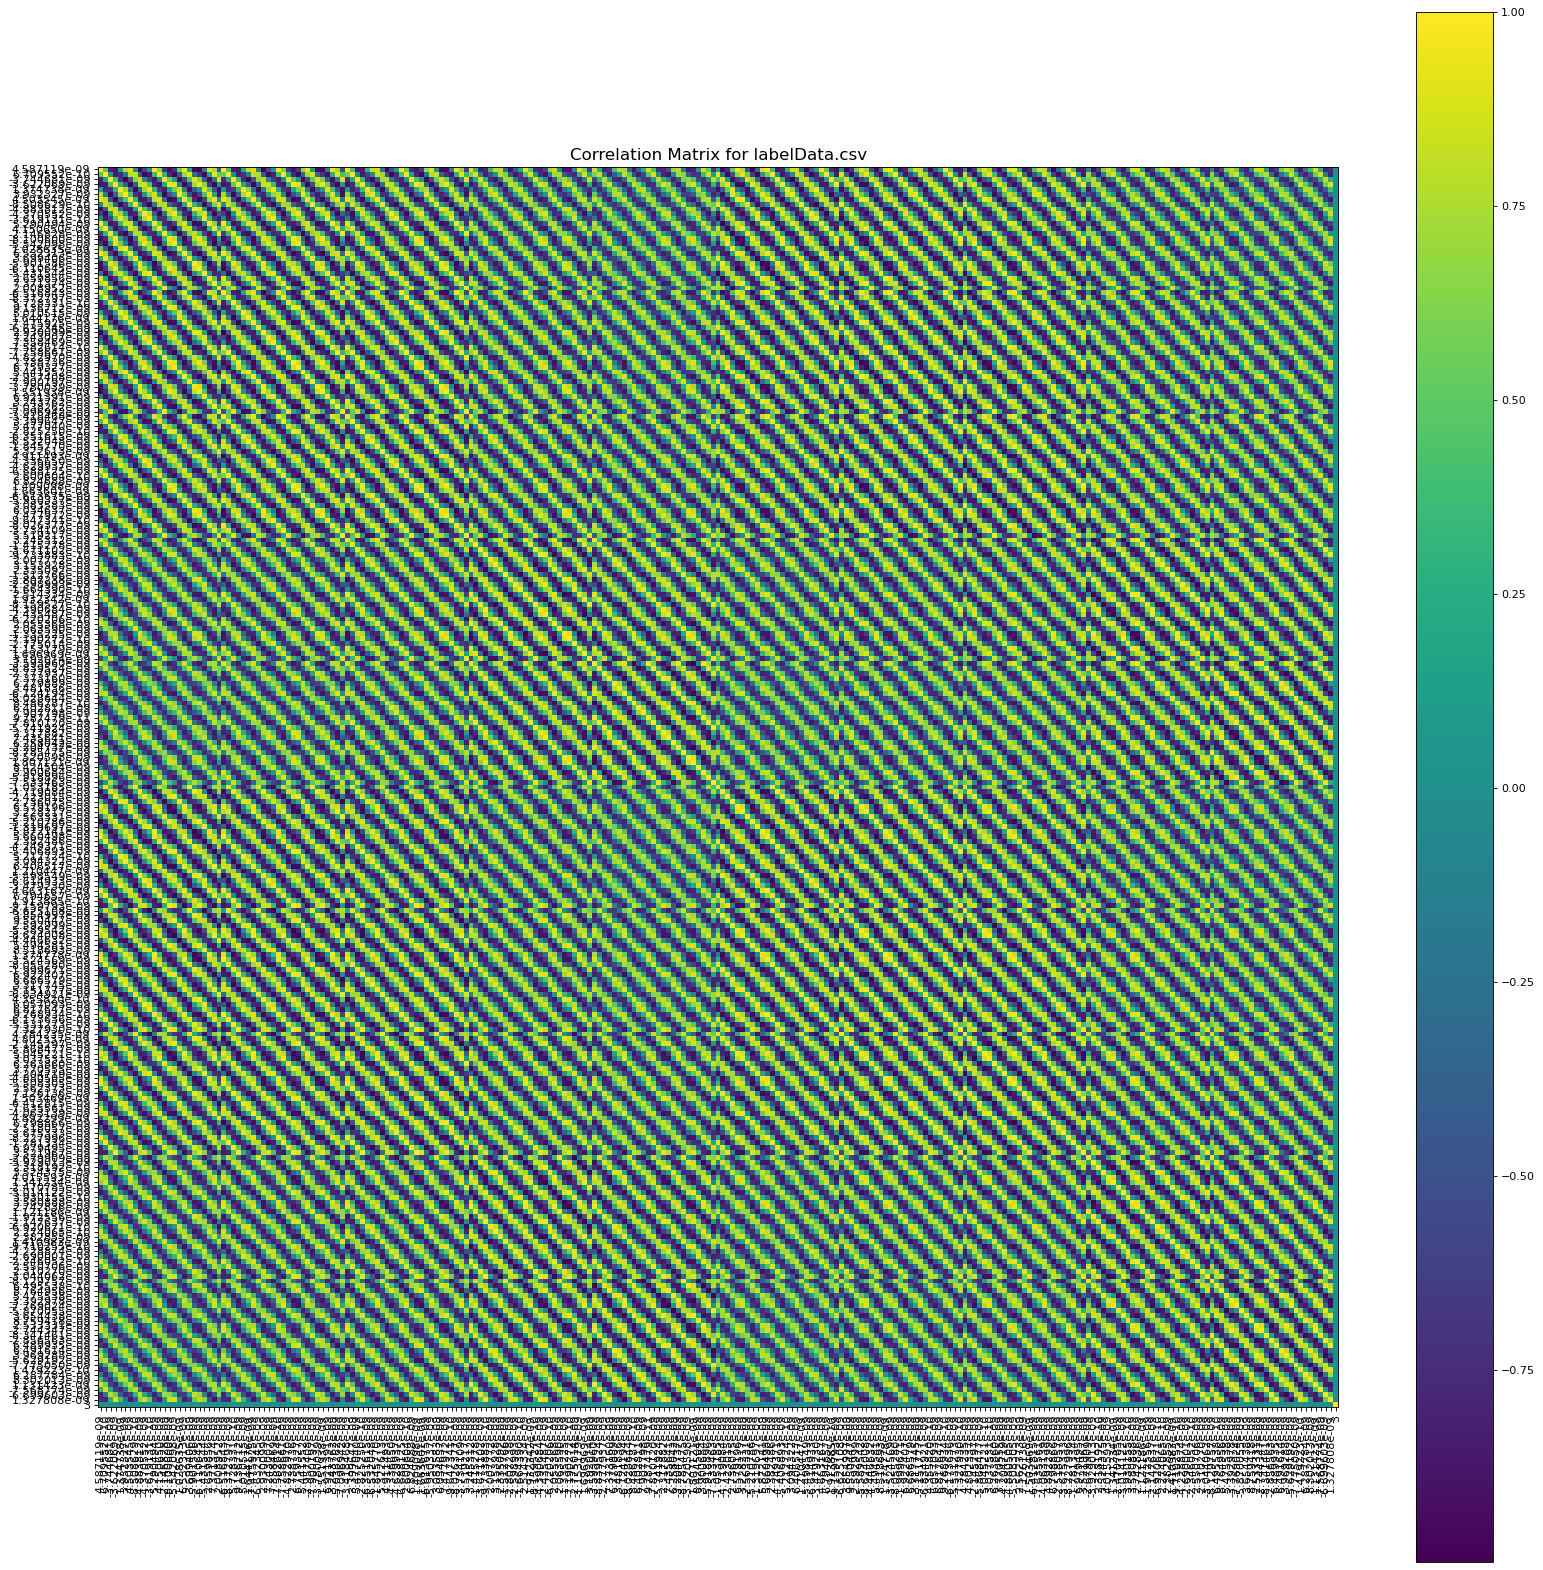

In [8]:
plotCorrelationMatrix(df1, 25)

Scatter and density plots:

/tmp/ipykernel_51/950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


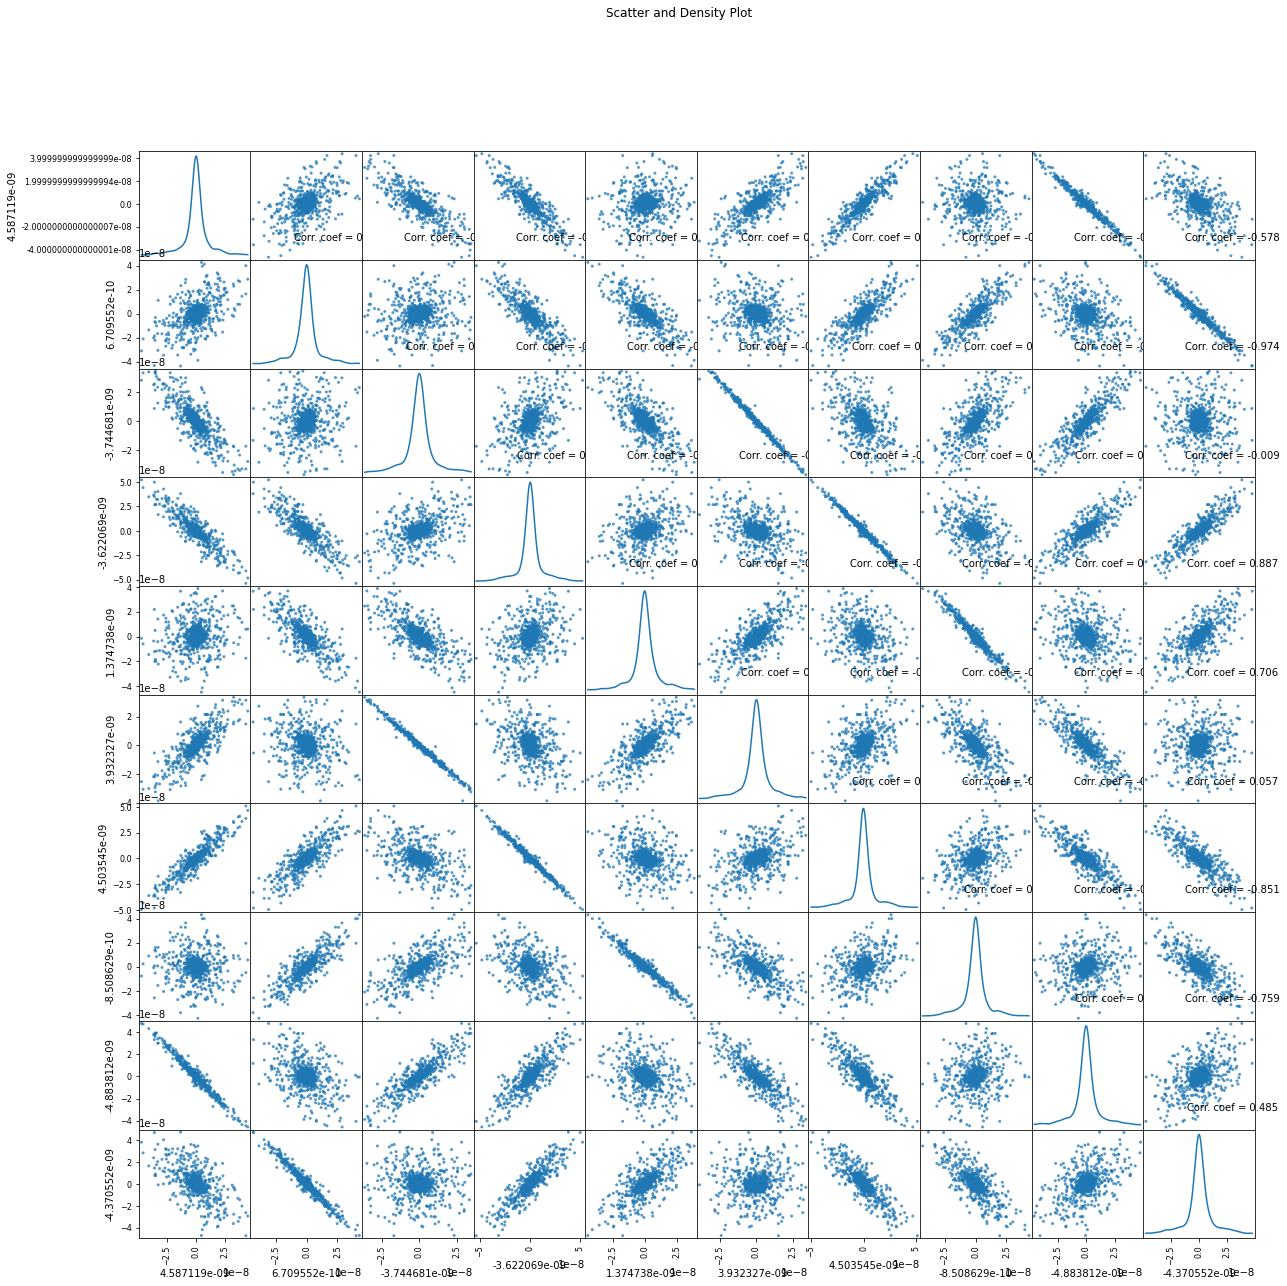

In [9]:
plotScatterMatrix(df1, 20, 10)

## Conclusion and credits:

Exploratory analysis by Jordi Garcia Castillon with SageMaker Studio Lab and with GPL-3.0 license, for the AWS Disaster Response hackathon. Data obtained from Kaggle (user: jiahuali). Hosted on Github: https://github.com/gcjordi/rfsignalsml_spectrumsensdisasters_jgc 